# 1 Realce de bordas

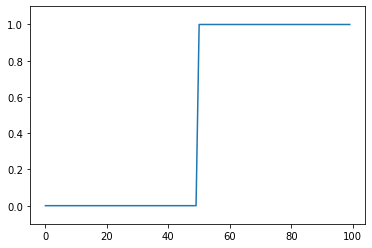

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from skimage.filters.rank import mean, median
from skimage.morphology import disk, ball, square

step_signal = np.zeros(100)
step_signal[50:] = 1
fig, ax = plt.subplots()
# Aqui, eu poderia usar o figsize=(5, 5) para controlar o tamanho do plot:
# fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(step_signal)
ax.margins(y=0.1)

Adicionando ruído gaussiano:

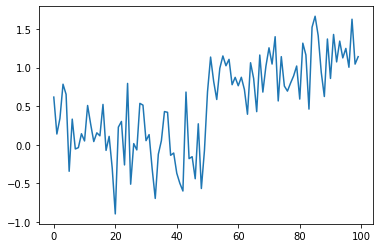

In [3]:
np.random.seed(0)
noisy_signal = (step_signal
                + np.random.normal(0, 0.35, step_signal.shape))
fig, ax = plt.subplots()
ax.plot(noisy_signal); 

## 1.1 Filtro de derivada de primeira ordem

Note a diferença entre convolução e correlação (a convolução usa o espelho do filtro)

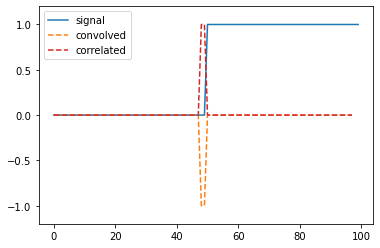

In [4]:
result_corr = np.correlate(step_signal, np.array([-1, 0, 1]),
                           mode='valid')

result_conv = np.convolve(step_signal, np.array([-1, 0, 1]),
                          mode='valid')

fig, ax = plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(result_conv, linestyle='dashed', label='convolved')
ax.plot(result_corr, linestyle='dashed', label='correlated',
        color='C3')
ax.legend(loc='upper left')
ax.margins(y=0.1) 

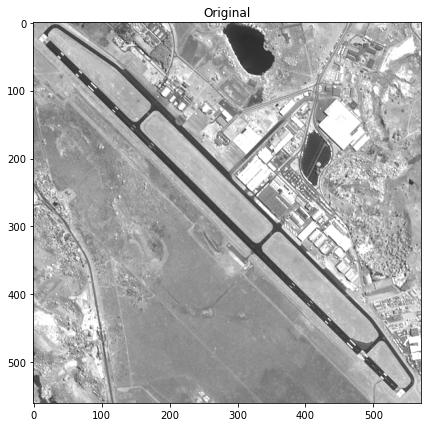

In [4]:
aero = io.imread('sjaero.tif') 
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(aero, vmin=0, vmax=255, cmap='gray')
ax.set_title('Original'); 

### 1.1.1 Realce por prewitt

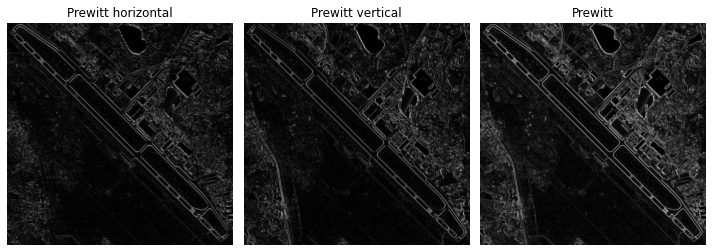

In [19]:
# Kernel usado na máscara vertical (realça bordas na horizontal):
#1/3   1/3   1/3
  #0     0     0
#-1/3  -1/3  -1/3

## Kernel usado na máscara horizontal (realça bordas na vertical):
#1/3   0  -1/3
#1/3   0  -1/3
#1/3   0  -1/3

aero_prewitt_h = filters.prewitt_h(aero)
aero_prewitt_v = filters.prewitt_v(aero)
aero_prewitt   = filters.prewitt(aero)

# display results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(abs(aero_prewitt_h), cmap=plt.cm.gray)
ax[0].set_title('Prewitt horizontal')

ax[1].imshow(abs(aero_prewitt_v), cmap=plt.cm.gray)
ax[1].set_title('Prewitt vertical')

ax[2].imshow(aero_prewitt, cmap=plt.cm.gray)
ax[2].set_title('Prewitt')

for a in ax:
    a.axis('off')

#a = aero_prewitt[1:10,1:10]
#print(abs(a))
plt.tight_layout()

### 1.1.2 Realce por sobel

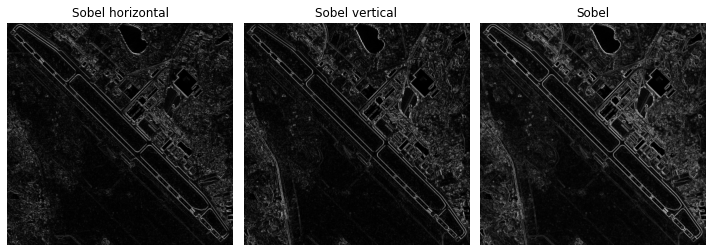

In [26]:
# Kernel usado na máscara vertical (realça bordas na horizontal):
 #1   2   1
 #0   0   0
#-1  -2  -1

## Kernel usado na máscara horizontal (realça bordas na vertical):
#1   0  -1
#2   0  -2
#1   0  -1

aero_sobel_h = filters.sobel_h(aero)
aero_sobel_v = filters.sobel_v(aero)
aero_sobel   = filters.sobel(aero)

# display results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(abs(aero_sobel_h), cmap=plt.cm.gray)
ax[0].set_title('Sobel horizontal')

ax[1].imshow(abs(aero_sobel_v), cmap=plt.cm.gray)
ax[1].set_title('Sobel vertical')

ax[2].imshow(aero_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

for a in ax:
    a.axis('off')

plt.tight_layout()

### 1.1.3 Realce por Roberts

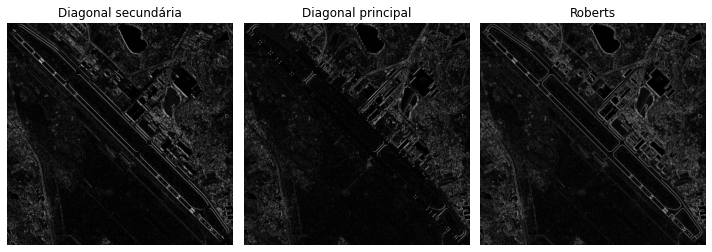

In [27]:
#Kernel usado para diagonal secundária
 #0   1
#-1   0

#Kernel usado para diagonal principal
#1   0
#0  -1

aero_roberts_neg = filters.roberts_neg_diag(aero)
aero_roberts_pos = filters.roberts_pos_diag(aero)
aero_roberts   = filters.roberts(aero)

# display results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(abs(aero_roberts_neg), cmap=plt.cm.gray)
ax[0].set_title('Diagonal secundária')

ax[1].imshow(abs(aero_roberts_pos), cmap=plt.cm.gray)
ax[1].set_title('Diagonal principal')

ax[2].imshow(aero_roberts, cmap=plt.cm.gray)
ax[2].set_title('Roberts')

for a in ax:
    a.axis('off')

plt.tight_layout()


## 1.2 Utilizando derivadas de segunda ordem

### 1.2.1 Laplaciano

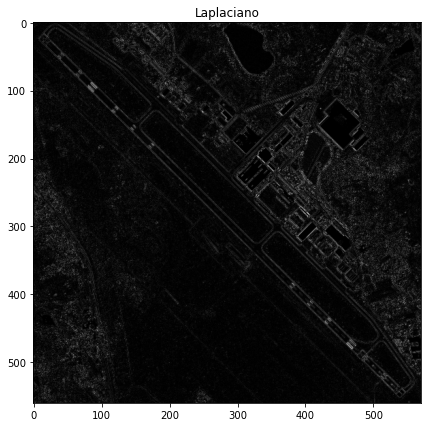

In [17]:
order = 3

aero_laplace = abs(filters.laplace(aero,order))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(aero_laplace, cmap='gray')
ax.set_title('Laplaciano'); 


# 2 Filtros de aguçamento
## 2.1 Filtro high boost

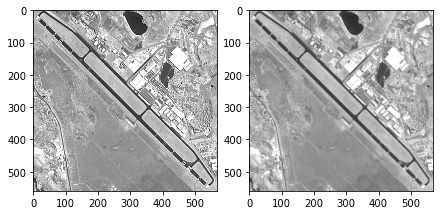

In [14]:
#%Aguçamento usando máscara obtida da suavização****************************
#%Tamanho da máscara de suavização
#%Usando suavização por média
S = mean(aero, square(3))
k  = 5
n  = 7

Mask = aero.astype(float) - S.astype(float)
A1   = aero.astype(float) + (k * Mask)

fig,ax = plt.subplots(1,2,constrained_layout=True)
ax[0].imshow(A1,vmin = 0,vmax = 255,cmap='gray')
ax[1].imshow(aero,vmin = 0,vmax = 255,cmap='gray')

## 2.2 Aguçamento usando prewitt

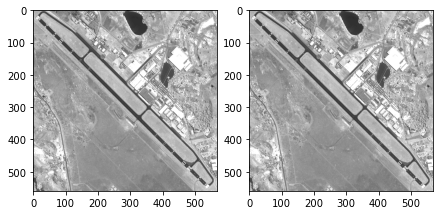

In [20]:
#%Aguçamento usando prewitt*************************************************
#%detectando bordas
Mask = aero_prewitt
A2 = aero.astype(float) + Mask

fig,ax = plt.subplots(1,2,constrained_layout=True)
ax[0].imshow(A2,vmin = 0,vmax = 255,cmap='gray')
ax[1].imshow(aero,vmin = 0,vmax = 255,cmap='gray')